In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ABACUS_Dataset.csv")
df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Y
0,CUST00001,55,0.00,0.00,0.0,0.0,0.0,1067.81,0.00,1841.05,2,0,0,0,0,0,1,0,0,0,0,1,1,0,0,48000,70900,0,48000,0,0,0,0,0,0,0,0,0,0,48000,22900,48000,22900,0,0,0.00,54,51,54,51,54,51,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1067.81,0.00,18509.75
1,CUST00002,34,0.00,0.00,0.0,0.0,0.0,15194.53,23307.45,23307.45,2,2,0,0,1,0,0,0,0,1,0,1,1,1,1,504250,954250,954250,0,0,504250,0,0,0,0,0,504250,0,0,504250,450000,504250,450000,504250,450000,0.69,51,50,51,50,51,50,0.00,0.00,0.67,0.0,8112.92,0.0,0.0,0.00,0.00,67190.09
2,CUST00003,32,1098.11,0.00,0.0,0.0,0.0,1098.11,1604.56,1604.56,2,2,0,0,0,0,1,0,0,0,0,1,1,1,1,49362,64361,64361,49362,0,0,0,0,49362,0,0,0,0,0,49362,14999,49362,14999,49362,14999,1.00,90,8,90,8,90,8,0.00,0.00,1.00,0.0,0.00,0.0,0.0,1098.11,0.00,52990.79
3,CUST00004,42,0.00,36147.68,1921.3,0.0,0.0,31624.71,62188.26,78489.06,10,6,2,3,1,0,1,3,3,2,0,3,7,1,5,1223605,2916811,2075911,36000,175306,1082000,0,0,0,1398605,175306,502000,0,0,580000,1223605,1118000,1798811,502000,1573911,0.93,103,8,101,103,59,8,0.14,0.78,0.21,1508.3,9331.67,0.0,0.0,800.86,31624.71,39518.28
4,CUST00005,33,0.00,18867.23,8487.6,0.0,0.0,21734.82,51411.97,71346.04,10,5,2,3,0,0,3,4,3,0,0,3,7,0,5,530000,1838498,1047598,140900,317598,0,0,0,0,730000,317598,0,0,0,62000,530000,140900,1697598,0,1047598,0.00,101,15,101,67,41,15,0.40,0.47,0.42,5331.4,0.00,0.0,0.0,1379.26,13698.13,13745.49


In [0]:
df.isnull().sum()

ID     0
V1     0
V2     0
V3     0
V4     0
      ..
V57    0
V58    0
V59    0
V60    0
Y      0
Length: 62, dtype: int64

In [0]:
df1 = df.drop(['ID'], axis=1)

In [0]:
df1.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Y
0,55,0.00,0.00,0.0,0.00,0.00,1067.81,0.00,1841.05,2,0,0,0,0,0,1,0,0,0,0,1,1,0,0,48000,70900,0,48000,0,0,0,0,0,0,0,0,0,0,48000,22900,48000,22900,0,0,0.00,54,51,54,51,54,51,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1067.81,0.00,18509.75
1,34,0.00,0.00,0.0,0.00,0.00,15194.53,23307.45,23307.45,2,2,0,0,1,0,0,0,0,1,0,1,1,1,1,504250,954250,954250,0,0,504250,0,0,0,0,0,504250,0,0,504250,450000,504250,450000,504250,450000,0.69,51,50,51,50,51,50,0.00,0.00,0.67,0.0,8112.92,0.00,0.00,0.00,0.00,67190.09
2,32,1098.11,0.00,0.0,0.00,0.00,1098.11,1604.56,1604.56,2,2,0,0,0,0,1,0,0,0,0,1,1,1,1,49362,64361,64361,49362,0,0,0,0,49362,0,0,0,0,0,49362,14999,49362,14999,49362,14999,1.00,90,8,90,8,90,8,0.00,0.00,1.00,0.0,0.00,0.00,0.00,1098.11,0.00,52990.79
3,42,0.00,36147.68,1921.3,0.00,0.00,31624.71,62188.26,78489.06,10,6,2,3,1,0,1,3,3,2,0,3,7,1,5,1223605,2916811,2075911,36000,175306,1082000,0,0,0,1398605,175306,502000,0,0,580000,1223605,1118000,1798811,502000,1573911,0.93,103,8,101,103,59,8,0.14,0.78,0.21,1508.3,9331.67,0.00,0.00,800.86,31624.71,39518.28
4,33,0.00,18867.23,8487.6,0.00,0.00,21734.82,51411.97,71346.04,10,5,2,3,0,0,3,4,3,0,0,3,7,0,5,530000,1838498,1047598,140900,317598,0,0,0,0,730000,317598,0,0,0,62000,530000,140900,1697598,0,1047598,0.00,101,15,101,67,41,15,0.40,0.47,0.42,5331.4,0.00,0.00,0.00,1379.26,13698.13,13745.49
5,34,0.00,16799.59,0.0,0.00,0.00,16867.22,16799.59,74487.52,11,1,1,0,0,0,1,6,2,0,0,1,10,0,1,650000,2265324,650000,37000,201844,0,0,0,0,650000,0,0,0,0,37000,650000,37000,2228324,0,650000,0.00,94,12,89,94,89,12,0.14,0.00,0.14,0.0,0.00,0.00,0.00,823.11,16799.59,35702.95
6,82,0.00,0.00,0.0,0.00,0.00,845.35,0.00,845.35,4,1,0,0,0,0,1,0,0,0,0,1,3,0,1,50000,155500,17500,38000,0,0,0,0,0,0,0,0,0,0,38000,50000,38000,117500,0,17500,0.00,74,9,74,38,74,9,0.00,0.00,-0.02,0.0,0.00,0.00,0.00,845.35,0.00,72035.06
7,60,1192.39,0.00,0.0,14926.28,30786.05,14169.12,57153.47,110544.69,28,9,0,0,1,3,3,12,0,2,3,16,12,9,0,820000,4906789,3003581,109599,0,821000,1658981,946000,53600,0,0,637000,1658981,654000,820000,200000,3535580,1371209,3003581,0,0.11,153,4,146,153,4,34,0.00,0.00,0.00,0.0,10248.74,7377.75,14169.12,1192.39,5169.10,36030.36
8,51,0.00,0.00,0.0,0.00,0.00,620.67,0.00,620.67,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,27900,27900,0,27900,0,0,0,0,0,0,0,0,0,0,27900,0,27900,0,0,0,0.00,104,104,104,0,104,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,620.67,0.00,25772.79
9,33,0.00,0.00,2750.4,0.00,0.00,5636.75,6210.43,7588.47,4,2,0,1,0,0,1,0,1,0,0,1,3,0,2,55008,126176,71998,39178,55008,0,0,0,0,0,55008,0,0,0,39178,55008,39178,86998,0,71998,0.00,73,8,73,35,73,8,0.00,0.00,0.24,2750.4,0.00,0.00,0.00,871.56,0.00,19509.49


In [0]:
df1.dtypes
#df1.count()

V1       int64
V2     float64
V3     float64
V4     float64
V5     float64
        ...   
V57    float64
V58    float64
V59    float64
V60    float64
Y      float64
Length: 61, dtype: object

In [0]:
corr_matrix = df1.corr("pearson")
#plt.figure(figsize=(20, 20))
#sns.heatmap(corr_matrix, square=True, annot=True)

corr_target = abs(corr_matrix['Y'])
print(corr_target)
list1 = corr_target[corr_target > 0.5]
print(list1)

V1     0.009181
V2     0.047930
V3     0.088563
V4     0.044335
V5     0.137306
         ...   
V57    0.154369
V58    0.150464
V59    0.119202
V60    0.063608
Y      1.000000
Name: Y, Length: 61, dtype: float64
Y    1.0
Name: Y, dtype: float64


In [0]:
#Ignore the rows having negative values.
df1_updated = df1[(df1 >= 0.0).all(1)]
df1_updated.count()
df1_updated.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Y
0,55,0.00,0.00,0.0,0.00,0.00,1067.81,0.00,1841.05,2,0,0,0,0,0,1,0,0,0,0,1,1,0,0,48000,70900,0,48000,0,0,0,0,0,0,0,0,0,0,48000,22900,48000,22900,0,0,0.00,54,51,54,51,54,51,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1067.81,0.00,18509.75
1,34,0.00,0.00,0.0,0.00,0.00,15194.53,23307.45,23307.45,2,2,0,0,1,0,0,0,0,1,0,1,1,1,1,504250,954250,954250,0,0,504250,0,0,0,0,0,504250,0,0,504250,450000,504250,450000,504250,450000,0.69,51,50,51,50,51,50,0.00,0.00,0.67,0.0,8112.92,0.00,0.00,0.00,0.00,67190.09
2,32,1098.11,0.00,0.0,0.00,0.00,1098.11,1604.56,1604.56,2,2,0,0,0,0,1,0,0,0,0,1,1,1,1,49362,64361,64361,49362,0,0,0,0,49362,0,0,0,0,0,49362,14999,49362,14999,49362,14999,1.00,90,8,90,8,90,8,0.00,0.00,1.00,0.0,0.00,0.00,0.00,1098.11,0.00,52990.79
3,42,0.00,36147.68,1921.3,0.00,0.00,31624.71,62188.26,78489.06,10,6,2,3,1,0,1,3,3,2,0,3,7,1,5,1223605,2916811,2075911,36000,175306,1082000,0,0,0,1398605,175306,502000,0,0,580000,1223605,1118000,1798811,502000,1573911,0.93,103,8,101,103,59,8,0.14,0.78,0.21,1508.3,9331.67,0.00,0.00,800.86,31624.71,39518.28
4,33,0.00,18867.23,8487.6,0.00,0.00,21734.82,51411.97,71346.04,10,5,2,3,0,0,3,4,3,0,0,3,7,0,5,530000,1838498,1047598,140900,317598,0,0,0,0,730000,317598,0,0,0,62000,530000,140900,1697598,0,1047598,0.00,101,15,101,67,41,15,0.40,0.47,0.42,5331.4,0.00,0.00,0.00,1379.26,13698.13,13745.49
5,34,0.00,16799.59,0.0,0.00,0.00,16867.22,16799.59,74487.52,11,1,1,0,0,0,1,6,2,0,0,1,10,0,1,650000,2265324,650000,37000,201844,0,0,0,0,650000,0,0,0,0,37000,650000,37000,2228324,0,650000,0.00,94,12,89,94,89,12,0.14,0.00,0.14,0.0,0.00,0.00,0.00,823.11,16799.59,35702.95
7,60,1192.39,0.00,0.0,14926.28,30786.05,14169.12,57153.47,110544.69,28,9,0,0,1,3,3,12,0,2,3,16,12,9,0,820000,4906789,3003581,109599,0,821000,1658981,946000,53600,0,0,637000,1658981,654000,820000,200000,3535580,1371209,3003581,0,0.11,153,4,146,153,4,34,0.00,0.00,0.00,0.0,10248.74,7377.75,14169.12,1192.39,5169.10,36030.36
8,51,0.00,0.00,0.0,0.00,0.00,620.67,0.00,620.67,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,27900,27900,0,27900,0,0,0,0,0,0,0,0,0,0,27900,0,27900,0,0,0,0.00,104,104,104,0,104,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,620.67,0.00,25772.79
9,33,0.00,0.00,2750.4,0.00,0.00,5636.75,6210.43,7588.47,4,2,0,1,0,0,1,0,1,0,0,1,3,0,2,55008,126176,71998,39178,55008,0,0,0,0,0,55008,0,0,0,39178,55008,39178,86998,0,71998,0.00,73,8,73,35,73,8,0.00,0.00,0.24,2750.4,0.00,0.00,0.00,871.56,0.00,19509.49
10,56,0.00,0.00,0.0,0.00,0.00,956.58,0.00,5107.47,9,0,0,0,0,0,1,0,5,0,0,1,8,0,0,43000,117431,0,43000,23836,0,0,0,0,0,0,0,0,0,43000,27500,43000,74431,0,0,0.00,227,17,98,227,98,17,0.00,0.00,0.00,0.0,0.00,0.00,0.00,956.58,0.00,36638.60


In [0]:
# Convert all the features to logarithmic scale as the distribution is highly skewed.
numeric_df = df1_updated.apply(lambda x: np.log1p(x))

numeric_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Y
0,4.025352,0.000000,0.000000,0.000000,0.0,0.0,6.974301,0.000000,7.518634,1.098612,0.000000,0.000000,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.000000,0.0,0.693147,0.693147,0.000000,0.000000,10.778977,11.169040,0.000000,10.778977,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,10.778977,10.038936,10.778977,10.038936,0.000000,0.000000,0.000000,4.007333,3.951244,4.007333,3.951244,4.007333,3.951244,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.974301,0.000000,9.826107
1,3.555348,0.000000,0.000000,0.000000,0.0,0.0,9.628757,10.056571,10.056571,1.098612,1.098612,0.000000,0.000000,0.693147,0.0,0.000000,0.000000,0.000000,0.693147,0.0,0.693147,0.693147,0.693147,0.693147,13.130829,13.768682,13.768682,0.000000,0.000000,13.130829,0.0,0.0,0.000000,0.000000,0.000000,13.130829,0.0,0.0,13.130829,13.017005,13.130829,13.017005,13.130829,13.017005,0.524729,3.951244,3.931826,3.951244,3.931826,3.951244,3.931826,0.000000,0.000000,0.512824,0.000000,9.001336,0.0,0.0,0.000000,0.000000,11.115296
2,3.496508,7.002256,0.000000,0.000000,0.0,0.0,7.002256,7.381228,7.381228,1.098612,1.098612,0.000000,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.000000,0.0,0.693147,0.693147,0.693147,0.693147,10.806956,11.072279,11.072279,10.806956,0.000000,0.000000,0.0,0.0,10.806956,0.000000,0.000000,0.000000,0.0,0.0,10.806956,9.615805,10.806956,9.615805,10.806956,9.615805,0.693147,4.510860,2.197225,4.510860,2.197225,4.510860,2.197225,0.000000,0.000000,0.693147,0.000000,0.000000,0.0,0.0,7.002256,0.000000,10.877892
3,3.761200,0.000000,10.495396,7.561278,0.0,0.0,10.361726,11.037938,11.270727,2.397895,1.945910,1.098612,1.386294,0.693147,0.0,0.693147,1.386294,1.386294,1.098612,0.0,1.386294,2.079442,0.693147,1.791759,14.017313,14.886002,14.545911,10.491302,12.074294,13.894323,0.0,0.0,0.000000,14.150987,12.074294,13.126357,0.0,0.0,13.270785,14.017313,13.927053,14.402637,13.126357,14.269075,0.657520,4.644391,2.197225,4.624973,4.644391,4.094345,2.197225,0.131028,0.576613,0.190620,7.319401,9.141276,0.0,0.0,6.686934,10.361726,10.584544
4,3.526361,0.000000,9.845235,9.046479,0.0,0.0,9.986717,10.847646,11.175311,2.397895,1.791759,1.098612,1.386294,0.000000,0.0,1.386294,1.609438,1.386294,0.000000,0.0,1.386294,2.079442,0.000000,1.791759,13.180634,14.424460,13.862011,11.855813,12.668545,0.000000,0.0,0.0,0.000000,13.500801,12.668545,0.000000,0.0,0.0,11.034906,13.180634,11.855813,14.344725,0.000000,13.862011,0.000000,4.624973,2.772589,4.624973,4.219508,3.737670,2.772589,0.336472,0.385262,0.350657,8.581557,0.000000,0.0,0.0,7.230027,9.525088,9.528539


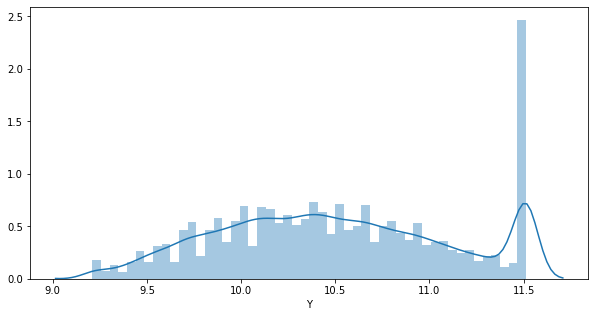

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(numeric_df['Y'])

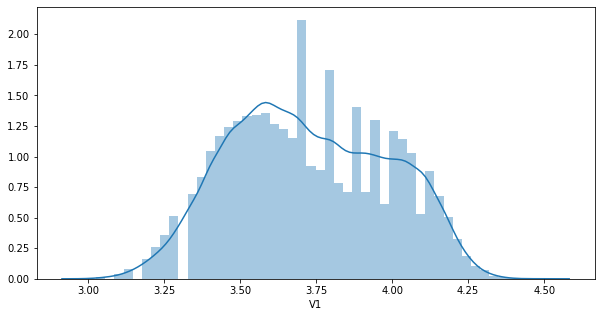

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(numeric_df['V1'])

In [0]:
#separate the target variable from the feature vector
target_y = numeric_df['Y']
df2 = numeric_df.drop(['Y'], axis=1)

In [0]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X_features = df2.columns
scaler = RobustScaler()
df2_copy = df2.copy()
X_train, X_test, y_train, y_test = train_test_split(df2_copy[X_features], target_y, test_size=0.2, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

###
# Try and increase the n_estimators and max_depth parameter one by one and see if it improves the result.
###
model = RandomForestRegressor(n_estimators= 200, max_depth=20, random_state=0)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)

# Actual and predicted results.
pred = pd.DataFrame({'Predicted_Y':Y_pred,'True_Y':y_test})
pred['Predicted_Y'] = pred['Predicted_Y'].apply(lambda x: np.exp(x) - 1)
pred['True_Y'] = pred['True_Y'].apply(lambda x: np.exp(x) - 1)
print(pred[['Predicted_Y', 'True_Y']].head())

print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print(metrics.mean_absolute_error(y_test, Y_pred))

df2_copy_1 = df2.copy()
X = df2_copy_1[X_features]
X = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=False).get_n_splits(X)
print(-cross_val_score(model, X, target_y, scoring='neg_mean_squared_error', cv=kf).mean())

print(-cross_val_score(model, X, target_y, scoring='neg_mean_absolute_error', cv=kf).mean())

0.5161465092311716
0.41848152892078516


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.2654454466516501
0.41670284604544816


In [0]:
from sklearn.ensemble import GradientBoostingRegressor
X_features = df2.columns
scaler = RobustScaler()
df2_copy = df2.copy()
X_train, X_test, y_train, y_test = train_test_split(df2_copy[X_features], target_y, test_size=0.2, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = GradientBoostingRegressor(random_state=5)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)

print(metrics.mean_absolute_error(y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

0.42153810909884465
0.5182283458556597


In [0]:
print(Y_pred)

[10.60010295 10.12237413 10.78142474 ... 10.37622825 10.78159714
 10.39981891]


In [0]:
from xgboost import XGBRegressor
X_features = df2.columns
scaler = RobustScaler()
df2_copy = df2.copy()
X_train, X_test, y_train, y_test = train_test_split(df2_copy[X_features], target_y, test_size=0.2, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)

print(metrics.mean_absolute_error(y_test, Y_pred))

print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.4220042664274135
0.5187226910470423
